# Second SDMS Assignment

## Exercise 1
Let $X_{t}$ a DTMC with stochastic matrix $A= \begin{bmatrix} 0 & 1 & 0 & 0 &0  \\  \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 & 0 \\ 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 \\ 0 & 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} \\ 0 & 0 & 0 & 1 & 0 \end{bmatrix}$ with $a=3, b=2$.
1. Prove that it is irreducible
2. Prove with probability simulation and with eigenvalues analysis that the DTMC has only a stationary distribution howewer that there is no convergence to that probability.
3. Prove that there can't be trajectory convergence and simulate some trajectories

## Exercise 2

Let $Y_{t}$ a (birth death) CTMC with rate matrix $A= \begin{bmatrix} -b & b & 0 & 0 &0  \\  a & -{a-b} & {b} & 0 & 0 \\ 0 & a & -a-b & b & 0 \\ 0 & 0 & a & -a-b & b \\ 0 & 0 & 0 & a & -a \end{bmatrix}$ with $a=3, b=2$.

Remember that if $\lambda_{i}=q_{i,i+1}$ and $\mu_{i}=q_{i,i-1}$, $i=0,...,N-1$ then the stationary distribution $\pi$ has values
$\pi_1=\frac{1}{1+\sum_{k=1}^\infty\prod_{i=1}^{k}\frac{\lambda_{i-1}}{\mu_i}}$  and 
$\pi_k=\pi_0\prod_{i=1}^k\frac{\lambda_{i-1}}{\mu_i},\quad k=1,\ldots,N-1$

1. Calculate the stationary distribution of the CTMC.
2. Prove with probability simulation and with eigenvalues analysis that the CTMC converges to that stationary distribution.
3. Simulate some trajectories 

## Exercise 3 (optional)
What is the relation between $Y_{t}$ and $X_{t}$?

## Solutions

In [1]:
import pydtmc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy
import random

### Exercise 1

#### 1.

In [2]:
# defining the Markov chain

a = 3
b = 2

A = np.array([[0, 1, 0, 0, 0],
              [a/(a+b), 0, b/(a+b), 0, 0],
              [0, a/(a+b), 0, b/(a+b), 0],
              [0, 0, a/(a+b), 0, b/(a+b)],
              [0, 0, 0, 1, 0]])

states = ["0", "1", "2", "3", "4"]

mc = pydtmc.MarkovChain(A, states)

In [3]:
# checking whether all pairs of states are communicating

comm_counter = 0   # communicating pairs counter
for pair in [(x, y) for x in states for y in states]:
    if mc.is_accessible(pair[0], pair[1]):
        comm_counter = comm_counter + 1
    
if comm_counter == len(states)**2:    # are all states pairs communicating?
    print("all states of the Markov chain are communicating")
else:
    print("not all states of the Markov chain are communicating")

all states of the Markov chain are communicating


Since all states of the Markov chain are accessible one from the other, they are all communicating. And since communication is an equivalence class, we can assert that all states belong to the same class, and therefore the chain is irreducible.

#### 2.

In [4]:
# function for eigenvalue analysis
def check_convergence(A, eps):

    eigens = np.linalg.eigvals(A)
    eigens = eigens[np.abs(np.abs(eigens)-1) < eps] ##exctract eigenvalues of the unit circle
    equal_ones = eigens[np.logical_and(eigens > 0, np.abs(np.imag(eigens)) < eps)]
    
    if len(equal_ones) == 1:
        print("one unique steady state distribution")
    else:
        print("infinite number of steady states")

    if len(equal_ones) < len(eigens):
        print("no convergence to steady distribution")
    else:
        print("convergence to steady distribution")


# function to compute the steady state probability
def steadystate_probability(A, p0, n):
    
    p=p0
    l=[]
    
    for i in range(n):
        p = p @ A
        l.append(p)
    return l

In [5]:
# analysing eigenvalues

check_convergence(A, 0.01)

one unique steady state distribution
no convergence to steady distribution


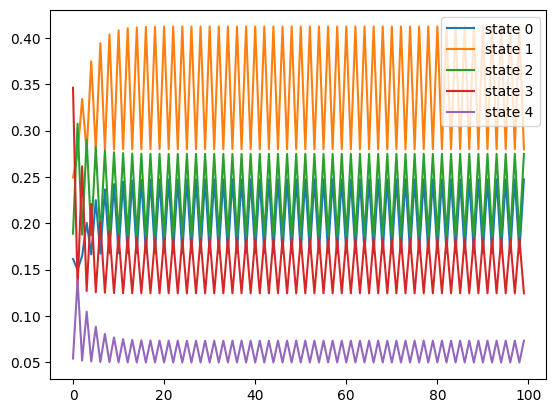

In [6]:
# doing a probability simulation

p0 = np.random.rand(5)
p0 = p0 / np.sum(p0)

p = steadystate_probability(A, p0, 100)

plt.plot(np.arange(len(p)), np.array(p),
         label=["state 0", "state 1", "state 2", "state 3", "state 4"])
plt.legend()

The plot confirms that there is no convergence to the steady probability distribution, in fact the distribution seems to oscillate constantly and indefinitely.

#### 3.

since the convergence of all trajectories implies the convergence of the steady state probability distribution, the non convergence to the steady state distribution implies the non convergence of trajectories. Now let's see some simulations of trajectories.

In [7]:
# function to compute a trajectory starting from a point chosen randomly according to
# a given starting probability

def compute_trajectory(A, p0, n):

    l=[]   # list to store trajectory points

    x0 = np.random.choice(np.arange(p0.shape[0]), size=1, p=p0)
    l.append(x0)
    x = x0

    for i in range(1, n):
        p = A[x].reshape(-1)
        x = np.random.choice(np.arange(p.shape[0]), size=1, p=p)
        l.append(x)
    
    return l

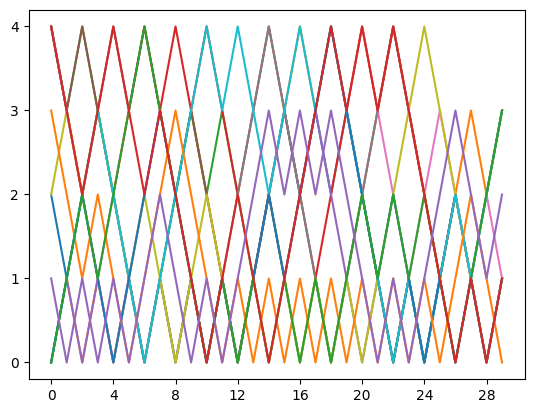

In [8]:
# simulting and plotting some trajectories

n = 30   # number of steps for all trajectories

traj = []   # list contaning trajectories
p0 = np.random.rand(5)
p0 = p0 / np.sum(p0)
for count in range(15):
    traj.append(compute_trajectory(A, p0, n))


x = np.arange(n)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
for t in traj:
    ax.plot(x, np.array(t))

plt.show()

Simulations confirm the non convergence of trajectories.

### Exercise 2

#### 1.

In [9]:
# defining the rate matrix

a = 3
b = 2

A = np.array([[-b, b, 0, 0, 0],
              [a, -a-b, b, 0, 0],
              [0, a, -a-b, b, 0],
              [0, 0, a, -a-b, b],
              [0, 0, 0, a, -a]])

In [10]:
# function to compute stationary probability distribution

def comp_stationary_distribution(A):

    N = A.shape[0]

    p = np.empty(N)
    p[0] = 1
    for k in range(1, N):
        p[k] = 1
        for i in range(1, k+1):
            p[k] = p[k] * A[i-1, i] / A[i, i-1]
    norm = np.sum(p)
    p = p / norm

    return p

In [11]:
# computing the stationary distribution for our system

p = comp_stationary_distribution(A)
print(p)

[0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]


#### 2.

In [12]:
# function for eigenvalue analysis
def check_convergence(A, eps):

    eigens = np.linalg.eigvals(A)

    zero_counter = np.sum(np.fabs(eigens) < eps)   # counting the number of zero eigenvalues

    if zero_counter == 1:
        print("the CTMC converges to a stationary distribution")
    else:
        print("the CTMC does not converge to a stationary distribution")

In [13]:
check_convergence(A, 1e-8)

the CTMC converges to a stationary distribution


Since there is only one eigenvalue equal o zero, we can conclude that the Markov chain converges to a stationary distribution.

In [14]:
# function for probability simulation
def CTMC_steadystate_probability(Q, p0, t):
    
    l=[]
    
    for i in t:
        p = p0 @ scipy.linalg.expm(Q*i)
        l.append(p)
        
    return np.array(l)

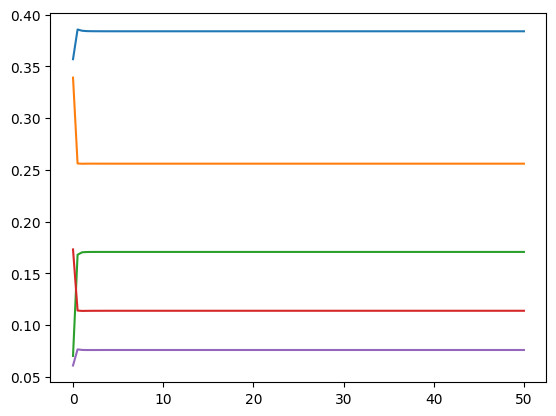

In [15]:
# simulating probability distribution

p0 = np.random.rand(5)
p0 = p0 / np.sum(p0)

t = np.linspace(0, 50, 100)

simul = CTMC_steadystate_probability(A, p0, t)

plt.plot(t, simul)

plt.show()

The plots clearly shows that the probability distribution converges to some steady distribution. The values of the probabilities that form this distribution seem to confirm that this steady distribution is the one found at point 1.

#### 3.

In [16]:
# function for trajectory simulation
def CTMC_simulation(Q, x0, max_time):
    
    A = Q.copy()
    np.fill_diagonal(A, 0)
    A = (A.T / (np.sum(A, axis=1))).T
    times = []
    states = []
    tot_time = 0
    times.append(tot_time)
    x = x0
    states.append(x)
    while tot_time < max_time:
        t = scipy.stats.expon(scale=-1/Q[x0, x0]).rvs(size=1)[0]
        tot_time = tot_time + t
        times.append(tot_time)
        states.append(x)
        x = np.random.choice(len(A), p=A[x])
        times.append(tot_time)
        states.append(x)
    
    return times,states

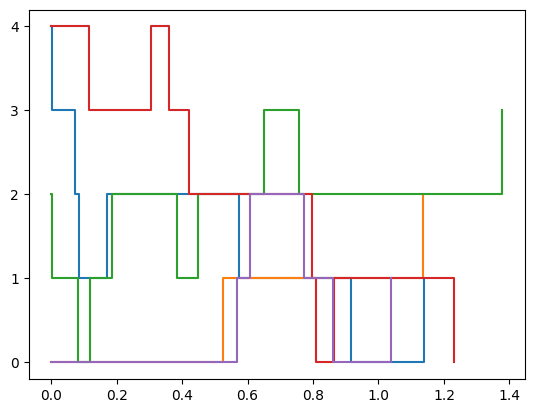

In [17]:
# simulting and plotting some trajectories

t_max = 1   # number of steps for all trajectories

traj = []   # list contaning trajectories
p0 = np.random.rand(5)
p0 = p0 / np.sum(p0)
for count in range(5):
    traj.append(CTMC_simulation(A, random.randint(0, 4), t_max))

fig, ax = plt.subplots()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
for t in traj:
    ax.plot(t[0], t[1])

plt.show()